In [9]:
import numpy as np
import pandas as pd
%matplotlib inline

In [10]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}


In [11]:
train = pd.DataFrame(critics).T

In [12]:
train

,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
Claudia Puig,3.0,NaN,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Michael Phillips,NaN,2.5,3.0,3.5,4.0,NaN
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,NaN,NaN,4.5,4.0,NaN,1.0


上述数据给出了7个不同的人分别对六部电影的打分情况，有部分没有过打分。  
接下来会进行简单的协同过滤算法演示

#### 寻找相近的用户

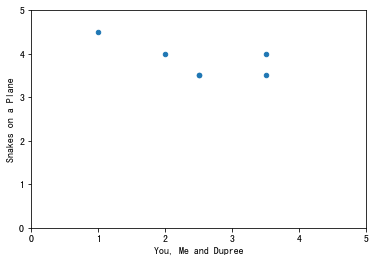

In [18]:
train.plot.scatter(y='Snakes on a Plane', x='You, Me and Dupree', xlim=(0,5), ylim=(0,5))

如上，可以看到用户之前的相似情况，两个点越近，表明用户之间的关系越相近。可以使用平方和来计算两个用户之间的相似度，值越小，表明越相近。取导数，可以从大到小排序。

In [98]:
def sim_distance(perfs, p1, p2):
    si = {}
    for item in perfs[p1]:
        if item in perfs[p2]:
            si[item] = 1
    if len(si) == 0: return 0
    sum_of_squares = np.sum([pow(perfs[p1][item] - perfs[p2][item], 2) 
                             for item in perfs[p1] if item in perfs[p2]])
    
    return 1 / (1 + np.sqrt(sum_of_squares))
sim_distance(critics, 'Claudia Puig', 'Gene Seymour')

0.28172904669025317

In [100]:
train.loc['Claudia Puig']['Just My Luck']  # 访问某个元素

3.0

除了用欧几里得距离，还可以使用皮尔逊相关系数来衡量相似度，在数据不是很规范的时候给出较好的结果。

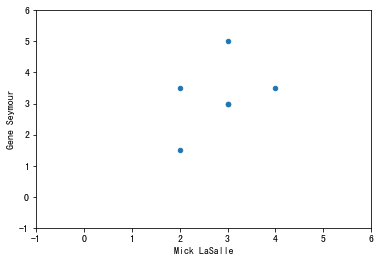

In [124]:
pd.DataFrame(critics).plot.scatter(x='Mick LaSalle', y='Gene Seymour', xlim=(-1,6), ylim=(-1,6))

如上图， 如果所有点能较好的拟合出一条直线，则表明两个用户之间的相似度越大。

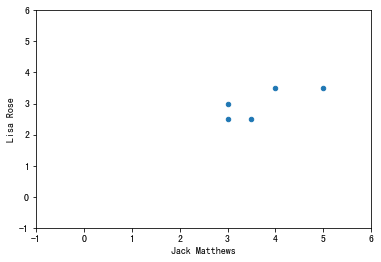

In [125]:
pd.DataFrame(critics).plot.scatter(x='Jack Matthews', y='Lisa Rose', xlim=(-1,6), ylim=(-1,6))

下面两个用户之间更相似

如上函数可以计算两个不同用户之间的相似程度。因此，可以根据上面数据构造用户相似矩阵。

In [127]:
m, n = train.shape
def person_sim():
    sim = np.zeros([m, m], dtype=np.float32)
    for i in range(m):
        for j in range(m):
            sim[i][j] = 1 / (1 + np.sqrt(np.sum(np.power(train.iloc[i] - train.iloc[j], 2))))
    return pd.DataFrame(index=train.index, columns=train.index, data=sim)
persion_sim()

,Claudia Puig,Gene Seymour,Jack Matthews,Lisa Rose,Michael Phillips,Mick LaSalle,Toby
Claudia Puig,1.000000,0.281729,0.320377,0.387426,0.535898,0.314520,0.356789
Gene Seymour,0.281729,1.000000,0.666667,0.294298,0.340542,0.277926,0.258246
Jack Matthews,0.320377,0.666667,1.000000,0.340542,0.320377,0.285714,0.267479
Lisa Rose,0.387426,0.294298,0.340542,1.000000,0.472136,0.414214,0.348331
Michael Phillips,0.535898,0.340542,0.320377,0.472136,1.000000,0.387426,0.387426
Mick LaSalle,0.314520,0.277926,0.285714,0.414214,0.387426,1.000000,0.400000
Toby,0.356789,0.258246,0.267479,0.348331,0.387426,0.400000,1.000000


In [113]:
如上图计算得到用户之间的相似度矩阵，下面就可以根据这个矩阵去推荐电影。

0.28172904669025317